"""
This program performs two different logistic regression implementations on two
different datasets of the format [float,float,boolean], one
implementation is in this file and one from the sklearn library. The program
then compares the two implementations for how well the can predict the given outcome
for each input tuple in the datasets.

@author Per Harald Borgen
"""


In [ ]:
import math
import numpy as np
import pandas as pd
from pandas import DataFrame
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from numpy import loadtxt, where
from pylab import scatter, show, legend, xlabel, ylabel

In [ ]:
# scale larger positive and values to between -1,1 depending on the largest
# value in the data
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
df = pd.read_csv("data.csv", header=0)

In [ ]:
# clean up data
df.columns = ["grade1","grade2","label"]

x = df["label"].map(lambda x: float(x.rstrip(';')))

In [ ]:
# formats the input data into two arrays, one of independant variables
# and one of the dependant variable
X = df[["grade1","grade2"]]
X = np.array(X)
X = min_max_scaler.fit_transform(X)
Y = df["label"].map(lambda x: float(x.rstrip(';')))
Y = np.array(Y)

In [ ]:
# creating testing and training set
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.33)

In [ ]:
# train scikit learn model
clf = LogisticRegression()
clf.fit(X_train,Y_train)
print ('score Scikit learn: ', clf.score(X_test,Y_test))

score Scikit learn:  0.8787878787878788


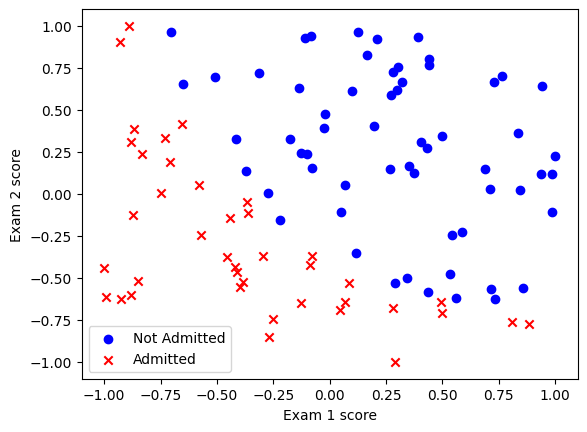

In [ ]:
# visualize data, uncomment "show()" to run it
pos = where(Y == 1)
neg = where(Y == 0)
scatter(X[pos, 0], X[pos, 1], marker='o', c='b')
scatter(X[neg, 0], X[neg, 1], marker='x', c='r')
xlabel('Exam 1 score')
ylabel('Exam 2 score')
legend(['Not Admitted', 'Admitted'])
show()

In [ ]:
##The sigmoid function adjusts the cost function hypotheses to adjust the algorithm proportionally for worse estimations
def Sigmoid(z):
	G_of_Z = float(1.0 / float((1.0 + math.exp(-1.0*z))))
	return G_of_Z

In [ ]:
##The hypothesis is the linear combination of all the known factors x[i] and their current estimated coefficients theta[i]
##This hypothesis will be used to calculate each instance of the Cost Function
def Hypothesis(theta, x):
	z = 0
	for i in range(len(theta)):
		z += x[i]*theta[i]
	return Sigmoid(z)

In [ ]:
##For each member of the dataset, the result (Y) determines which variation of the cost function is used
##The Y = 0 cost function punishes high probability estimations, and the Y = 1 it punishes low scores
##The "punishment" makes the change in the gradient of ThetaCurrent - Average(CostFunction(Dataset)) greater
def Cost_Function(X,Y,theta,m):
	sumOfErrors = 0
	for i in range(m):
		xi = X[i]
		hi = Hypothesis(theta,xi)
		if Y[i] == 1:
			error = Y[i] * math.log(hi)
		elif Y[i] == 0:
			error = (1-Y[i]) * math.log(1-hi)
		sumOfErrors += error
	const = -1/m
	J = const * sumOfErrors
	print ('cost is ', J )
	return J

In [ ]:
##This function creates the gradient component for each Theta value
##The gradient is the partial derivative by Theta of the current value of theta minus
##a "learning speed factor aplha" times the average of all the cost functions for that theta
##For each Theta there is a cost function calculated for each member of the dataset
def Cost_Function_Derivative(X,Y,theta,j,m,alpha):
	sumErrors = 0
	for i in range(m):
		xi = X[i]
		xij = xi[j]
		hi = Hypothesis(theta,X[i])
		error = (hi - Y[i])*xij
		sumErrors += error
	m = len(Y)
	constant = float(alpha)/float(m)
	J = constant * sumErrors
	return J

In [ ]:
##For each theta, the partial differential
##The gradient, or vector from the current point in Theta-space (each theta value is its own dimension) to the more accurate point,
##is the vector with each dimensional component being the partial differential for each theta value
def Gradient_Descent(X,Y,theta,m,alpha):
	new_theta = []
	constant = alpha/m
	for j in range(len(theta)):
		CFDerivative = Cost_Function_Derivative(X,Y,theta,j,m,alpha)
		new_theta_value = theta[j] - CFDerivative
		new_theta.append(new_theta_value)
	return new_theta

In [ ]:
##The high level function for the LR algorithm which, for a number of steps (num_iters) finds gradients which take
##the Theta values (coefficients of known factors) from an estimation closer (new_theta) to their "optimum estimation" which is the
##set of values best representing the system in a linear combination model
def Logistic_Regression(X,Y,alpha,theta,num_iters):
	m = len(Y)
	for x in range(num_iters):
		new_theta = Gradient_Descent(X,Y,theta,m,alpha)
		theta = new_theta
		if x % 100 == 0:
			#here the cost function is used to present the final hypothesis of the model in the same form for each gradient-step iteration
			Cost_Function(X,Y,theta,m)
			print ('theta ', theta)
			print ('cost is ', Cost_Function(X,Y,theta,m))
	Declare_Winner(theta)

In [ ]:
##This method compares the accuracy of the model generated by the scikit library with the model generated by this implementation
def Declare_Winner(theta):
    score = 0
    winner = ""
    #first scikit LR is tested for each independent var in the dataset and its prediction is compared against the dependent var
    #if the prediction is the same as the dataset measured value it counts as a point for thie scikit version of LR
    scikit_score = clf.score(X_test,Y_test)
    length = len(X_test)
    for i in range(length):
        prediction = round(Hypothesis(X_test[i],theta))
        answer = Y_test[i]
        if prediction == answer:
            score += 1
    #the same process is repeated for the implementation from this module and the scores compared to find the higher match-rate
    my_score = float(score) / float(length)
    if my_score > scikit_score:
        print ('You won!')
    elif my_score == scikit_score:
        print ('Its a tie!')
    else:
        print( 'Scikit won.. :(')
    print ('Your score: ', my_score)
    print ('Scikits score: ', scikit_score )

In [ ]:
# These are the initial guesses for theta as well as the learning rate of the algorithm
# A learning rate too low will not close in on the most accurate values within a reasonable number of iterations
# An alpha too high might overshoot the accurate values or cause irratic guesses
# Each iteration increases model accuracy but with diminishing returns,
# and takes a signficicant coefficient times O(n)*|Theta|, n = dataset length
initial_theta = [0,0]
alpha = 0.1
iterations = 1000
Logistic_Regression(X,Y,alpha,initial_theta,iterations)

cost is  0.6886958174712052
theta  [0.015808968977217012, 0.01403098220024927]
cost is  0.6886958174712052
cost is  0.6886958174712052
cost is  0.45043928326843835
theta  [1.1446039323506159, 1.030383323481578]
cost is  0.45043928326843835
cost is  0.45043928326843835
cost is  0.37210396400568835
theta  [1.7920198800927765, 1.6251057941038252]
cost is  0.37210396400568835
cost is  0.37210396400568835
cost is  0.33493174290971306
theta  [2.237807831138126, 2.0381775708737533]
cost is  0.33493174290971306
cost is  0.33493174290971306
cost is  0.3134393548415864
theta  [2.576451718002245, 2.35358660097723]
cost is  0.3134393548415864
cost is  0.3134393548415864
cost is  0.2995143683386588
theta  [2.8487364478320787, 2.608155678935002]
cost is  0.2995143683386588
cost is  0.2995143683386588
cost is  0.289810075955215
theta  [3.0758031030008572, 2.8210921909376734]
cost is  0.289810075955215
cost is  0.289810075955215
cost is  0.2826976528686292
theta  [3.2700162725064694, 3.003664875299880